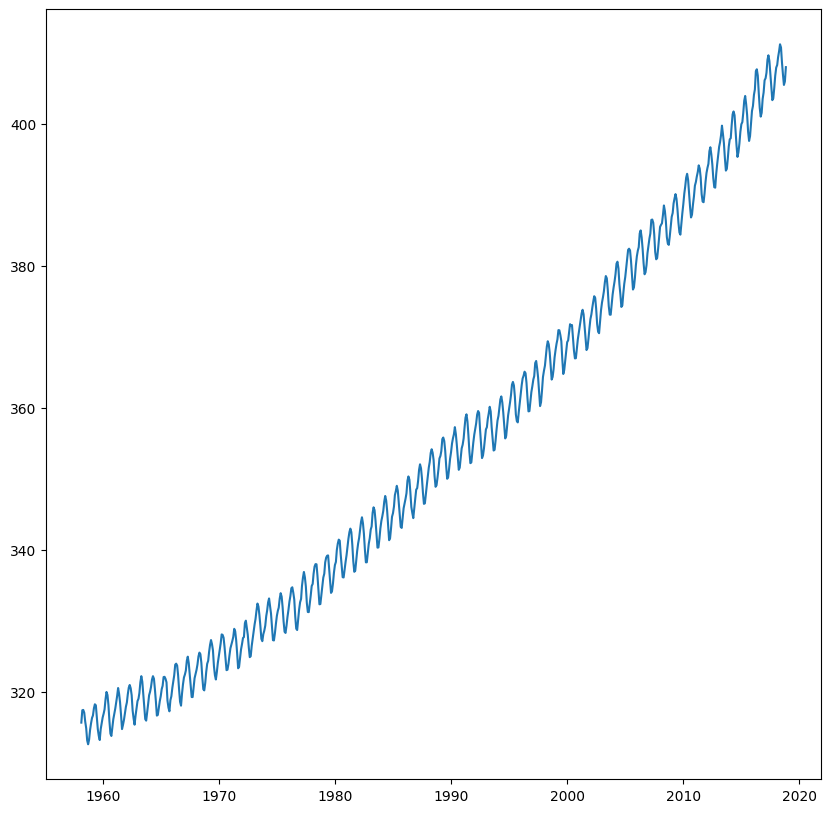

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import OutlierDetector

from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import variation
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import compress, product

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('cardox.csv', parse_dates=['date'])

df.index = df['date']
del df['date']
plt.figure(figsize=[10,10])
plt.plot(df)

In [2]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

# train=df['1958':'2017']
# train.head()

       Values                       Metric
0    4.994847              Test Statistics
1    1.000000                      p-value
2   20.000000             No. of lags used
3  708.000000  Number of observations used
4   -3.439620          critical value (1%)
5   -2.865631          critical value (5%)
6   -2.568948         critical value (10%)


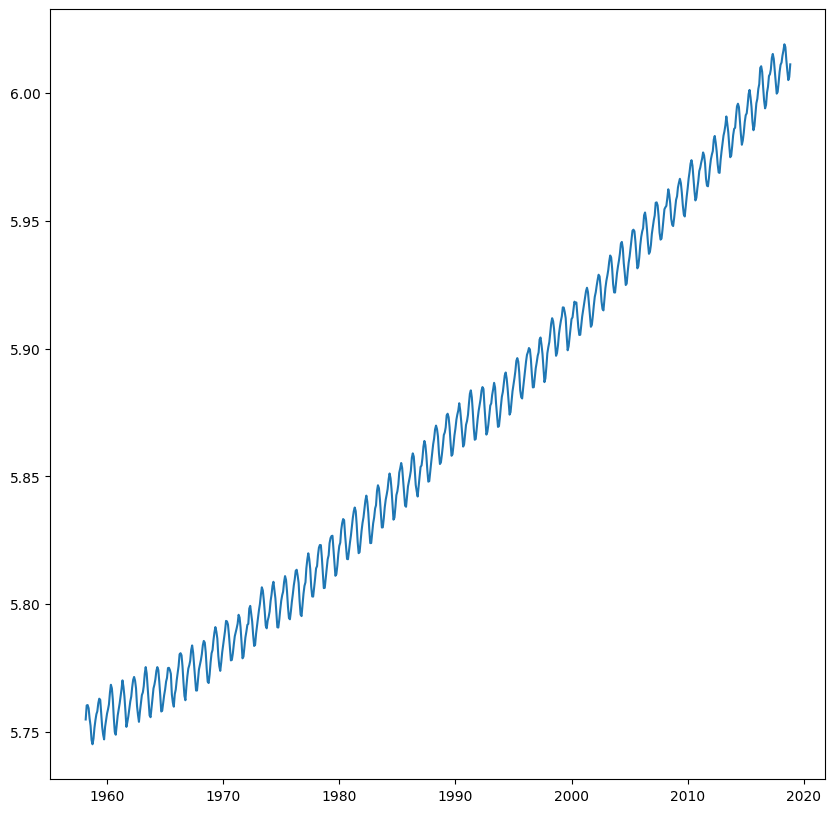

In [3]:
df_log = np.log(df)
plt.figure(figsize=[10,10])
plt.plot(df_log)


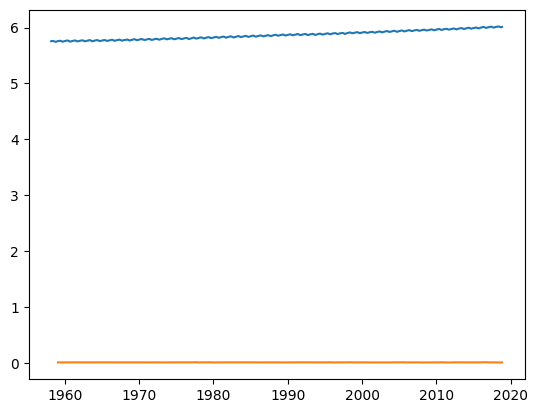

In [4]:
moving_avg = df_log.rolling(12).std()

plt.plot(df_log)
plt.plot(moving_avg)


In [5]:
df_log_moving_avg_diff = df_log - moving_avg
print(df_log_moving_avg_diff.head(15))


               value
date                
1958-03-01       NaN
1958-04-01       NaN
1958-05-01       NaN
1958-06-01       NaN
1958-07-01       NaN
1958-08-01       NaN
1958-09-01       NaN
1958-10-01       NaN
1958-11-01       NaN
1958-12-01       NaN
1959-01-01       NaN
1959-02-01  5.751687
1959-03-01  5.752592
1959-04-01  5.755680
1959-05-01  5.757170


In [6]:
df_log_moving_avg_diff.dropna(inplace=True)
print(df_log_moving_avg_diff.head(15))


               value
date                
1959-02-01  5.751687
1959-03-01  5.752592
1959-04-01  5.755680
1959-05-01  5.757170
1959-06-01  5.756404
1959-07-01  5.751275
1959-08-01  5.745748
1959-09-01  5.742904
1959-10-01  5.741318
1959-11-01  5.746657
1959-12-01  5.749261
1960-01-01  5.751947
1960-02-01  5.753589
1960-03-01  5.755360
1960-04-01  5.759433


In [7]:

adft = adfuller(df_log_moving_avg_diff ,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


       Values                       Metric
0    4.052452              Test Statistics
1    1.000000                      p-value
2   20.000000             No. of lags used
3  697.000000  Number of observations used
4   -3.439767          critical value (1%)
5   -2.865696          critical value (5%)
6   -2.568983         critical value (10%)


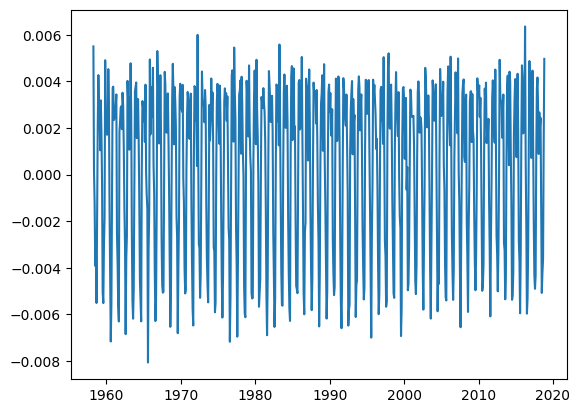

In [8]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)


In [9]:
df_log_diff.dropna(inplace=True)
adft = adfuller(df_log_diff ,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)
# results = mod.fit()


         Values                       Metric
0 -6.005496e+00              Test Statistics
1  1.619242e-07                      p-value
2  2.000000e+01             No. of lags used
3  7.070000e+02  Number of observations used
4 -3.439633e+00          critical value (1%)
5 -2.865637e+00          critical value (5%)
6 -2.568952e+00         critical value (10%)


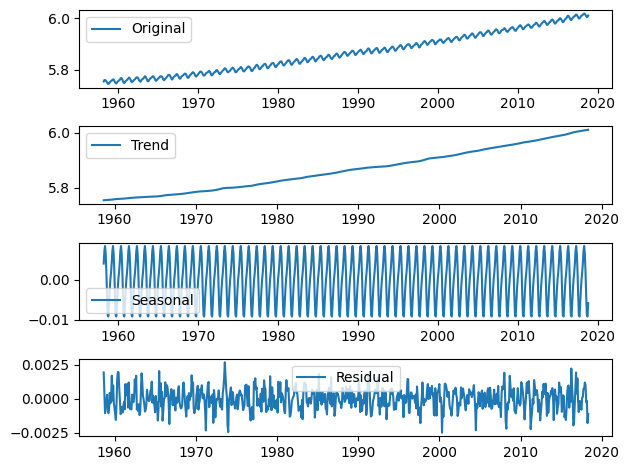

In [10]:
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()


In [11]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)

adft = adfuller(df_log_decompose ,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -9.958903e+00              Test Statistics
1  2.402733e-17                      p-value
2  2.000000e+01             No. of lags used
3  6.960000e+02  Number of observations used
4 -3.439780e+00          critical value (1%)
5 -2.865702e+00          critical value (5%)
6 -2.568986e+00         critical value (10%)


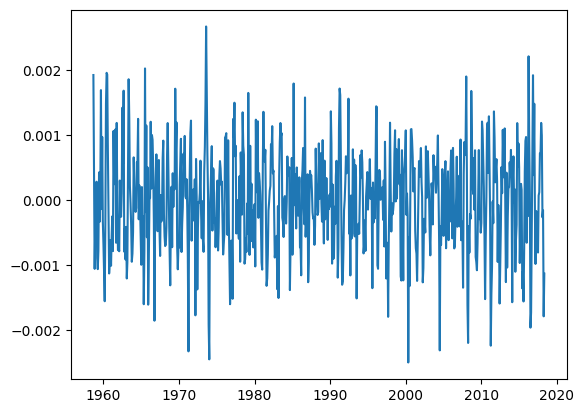

In [12]:
plt.plot(df_log_decompose)

In [19]:
# HWES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from random import random


fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='mul').fit()

pred_48 = fit1.forecast(48)
pred_48

2018-12-01    409.195971
2019-01-01    410.419346
2019-02-01    411.201327
2019-03-01    412.234176
2019-04-01    413.782226
2019-05-01    414.464524
2019-06-01    413.760134
2019-07-01    412.071739
2019-08-01    409.969574
2019-09-01    408.400460
2019-10-01    408.582071
2019-11-01    410.042600
2019-12-01    411.522754
2020-01-01    412.751980
2020-02-01    413.537299
2020-03-01    414.574908
2020-04-01    416.130637
2020-05-01    416.815695
2020-06-01    416.106200
2020-07-01    414.407128
2020-08-01    412.291953
2020-09-01    410.712858
2020-10-01    410.894406
2020-11-01    412.362107
2020-12-01    413.849537
2021-01-01    415.084615
2021-02-01    415.873271
2021-03-01    416.915639
2021-04-01    418.479047
2021-05-01    419.166866
2021-06-01    418.452266
2021-07-01    416.742517
2021-08-01    414.614331
2021-09-01    413.025256
2021-10-01    413.206741
2021-11-01    414.681614
2021-12-01    416.176320
2022-01-01    417.417249
2022-02-01    418.209244
2022-03-01    419.256371


In [18]:
def sesonal(data, s):
    plt.figure(figsize=(19,8), dpi= 80)
    for i, y in enumerate(data.index.year.unique()):
        plt.plot(list(range(1,len(data[data.index.year==y])+1)), data[data.index.year==y][data.columns[0]].values, label=y)
    plt.title("Сезонність по періодам")
    plt.legend(loc="best")
    plt.show()
    
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стаціонарність:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значення = {:.3f}".format(dftest[1]))
    print("Критичне значення :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Дані {} стационарні з ймовірністю {}% відсотків".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартна похибка:', round(((real-forecast)**2).mean()**0.5,4)) 

In [20]:
metrics(df, fit1.forecast(len(df)))

Тест на стаціонарність:
	T-статистика = -4.403
	P-значення = 0.000
Критичне значення :
	1%: -3.4395418285955563 - Дані  стационарні з ймовірністю 99% відсотків
	5%: -2.865596454500293 - Дані  стационарні з ймовірністю 95% відсотків
	10%: -2.5689301318958955 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 127.0745
MSE: 16359.7054
MAPE: 0.3585
MPE: -0.3585
Стандартна похибка: 127.9051


In [21]:
model = auto_arima(df, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=466.229, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.952, Time=1.83 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.633, Time=1.81 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=507.098, Time=4.46 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.916, Time=3.92 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=0.44 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.65 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.746, Time=4.18 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.11 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=447.425, Time=2.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : A

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [23]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(2, 1, 1),
                                seasonal_order=(1, 0, 1, 12))

In [24]:
results = mod.fit()

In [46]:
predict=results.get_prediction(start='2018', end='2019')
df

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


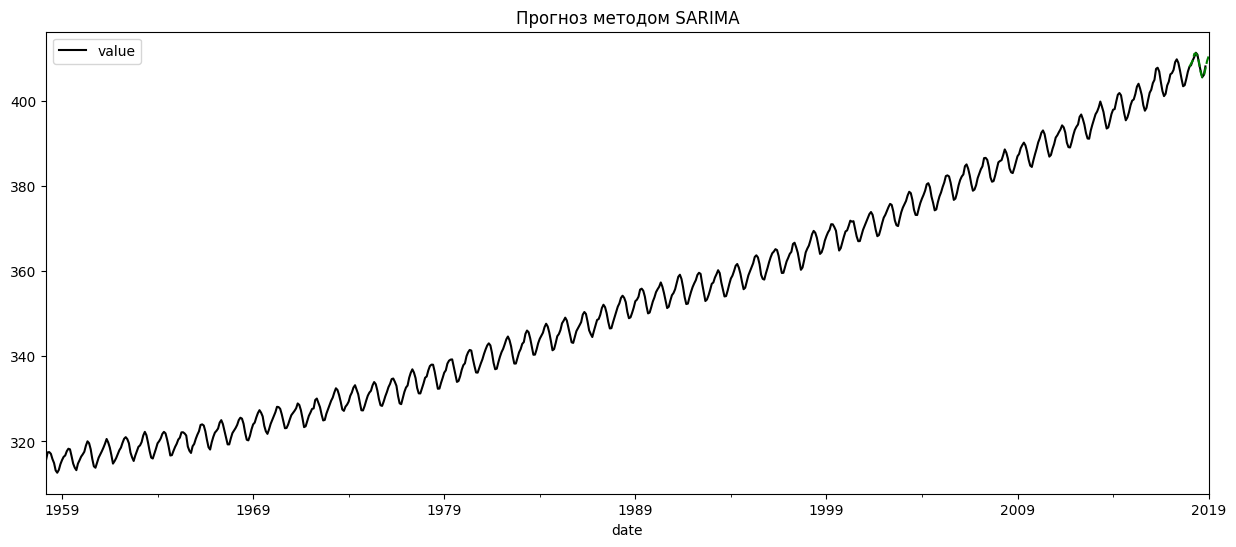

In [47]:
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом SARIMA" )
predict.predicted_mean.plot(ax=ax, style='--', color='green')
plt.show()

In [48]:
metrics(df, results.forecast(len(df)))

Тест на стаціонарність:
	T-статистика = -4.383
	P-значення = 0.000
Критичне значення :
	1%: -3.4395418285955563 - Дані  стационарні з ймовірністю 99% відсотків
	5%: -2.865596454500293 - Дані  стационарні з ймовірністю 95% відсотків
	10%: -2.5689301318958955 - Дані  стационарні з ймовірністю 90% відсотків
MAD: 124.3503
MSE: 15631.4678
MAPE: 0.3511
MPE: -0.3511
Стандартна похибка: 125.0259


In [49]:
df_2030 = results.forecast(250)

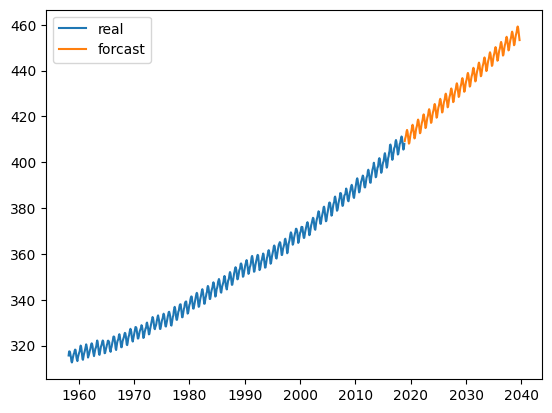

In [57]:
plt.plot(df, label='real')
plt.plot(df_2030, label='forcast')
plt.legend(loc="best")

In [51]:
df

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


In [58]:
df_2030.to_csv('./carbox_2030.csv')

In [60]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3519      0.104      3.391      0.001       0.149       0.555
ar.L2          0.0880      0.030      2.941      0.003       0.029       0.147
ma.L1         -0.7073      0.091     -7.738      0.000      -0.886      -0.528
ar.S.L12       0.9996      0.000   2966.533      0.000       0.999       1.000
ma.S.L12      -0.8667      0.021    -40.635      0.000      -0.909      -0.825
sigma2         0.0957      0.005     20.456      0.000       0.087       0.105


In [62]:
df_2030

2018-12-01    409.257103
2019-01-01    410.415561
2019-02-01    411.077535
2019-03-01    411.992206
2019-04-01    413.442759
                 ...    
2039-05-01    459.219550
2039-06-01    458.489511
2039-07-01    456.761531
2039-08-01    454.727822
2039-09-01    453.284867
Freq: MS, Name: predicted_mean, Length: 250, dtype: float64